# Physical Therapy Exercises dataset
http://dx.doi.org/10.13140/RG.2.2.20101.01768

This notebook is inspired by: 
https://github.com/ML-KULeuven/locomotif/blob/main/physiotherapy-use-case/apply_locomotif_physiotherapy.ipynb

In [36]:
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, "../")
from leitmotifs.plotting import *

import seaborn as sns
from leitmotifs.lama import *

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

import warnings
warnings.simplefilter("ignore")

def znormalize(ts):
    for i in range(3):
        ts[:, 3*i : 3*(i+1)] \
            = ((ts[:, 3*i : 3*(i+1)] - np.mean(ts[:, 3*i : 3*(i+1)], axis=None)) / 
               np.std(ts[:, 3*i : 3*(i+1)], axis=None))
    return ts

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
subjects  = range(1, 6)
exercises = range(1, 9)
relevant_imus = np.array([2, 4, 2, 2, 2, 2, 2, 2])

root_path = "../datasets/physiodata"
df = pd.DataFrame(columns=['subject', 'exercise', 'imu', 'ts'])

for subject in subjects:
    for exercise, imu in zip(exercises, relevant_imus):
        path = os.path.join(root_path, f"s{subject}", f"e{exercise}", f"u{imu}", "test.txt")
        f = open(path)
        next(f)        
        data = np.array([l.split(';') for l in f.readlines()], dtype=np.float64)        
        # acc (3 spatial axes), gyr (3 spatial axes), mag (3 spatial axes)
        df.loc[len(df.index)] = [subject, exercise, imu, data[:, 1:]] 
        f.close()
df['ts'] = df['ts'].apply(znormalize)
df.head()

df_gt = read_ground_truth("../datasets/physiodata/physio")
print(df_gt)

../datasets/physiodata/physio_gt.csv
         Correct        Too Fast Correct (Low Amplitude)
id                                                      
0   [[11, 1545]]  [[2564, 3333]]          [[4073, 5490]]


In [38]:
subject   = 2
exercise  = 1
imu       = 2

print(f"Subject {subject}, Exercise {exercise}, IMU {imu}")
*_, ts = df.query('subject == @subject & exercise == @exercise & imu == @imu').iloc[0]

Subject 2, Exercise 1, IMU 2


(9, 5526)


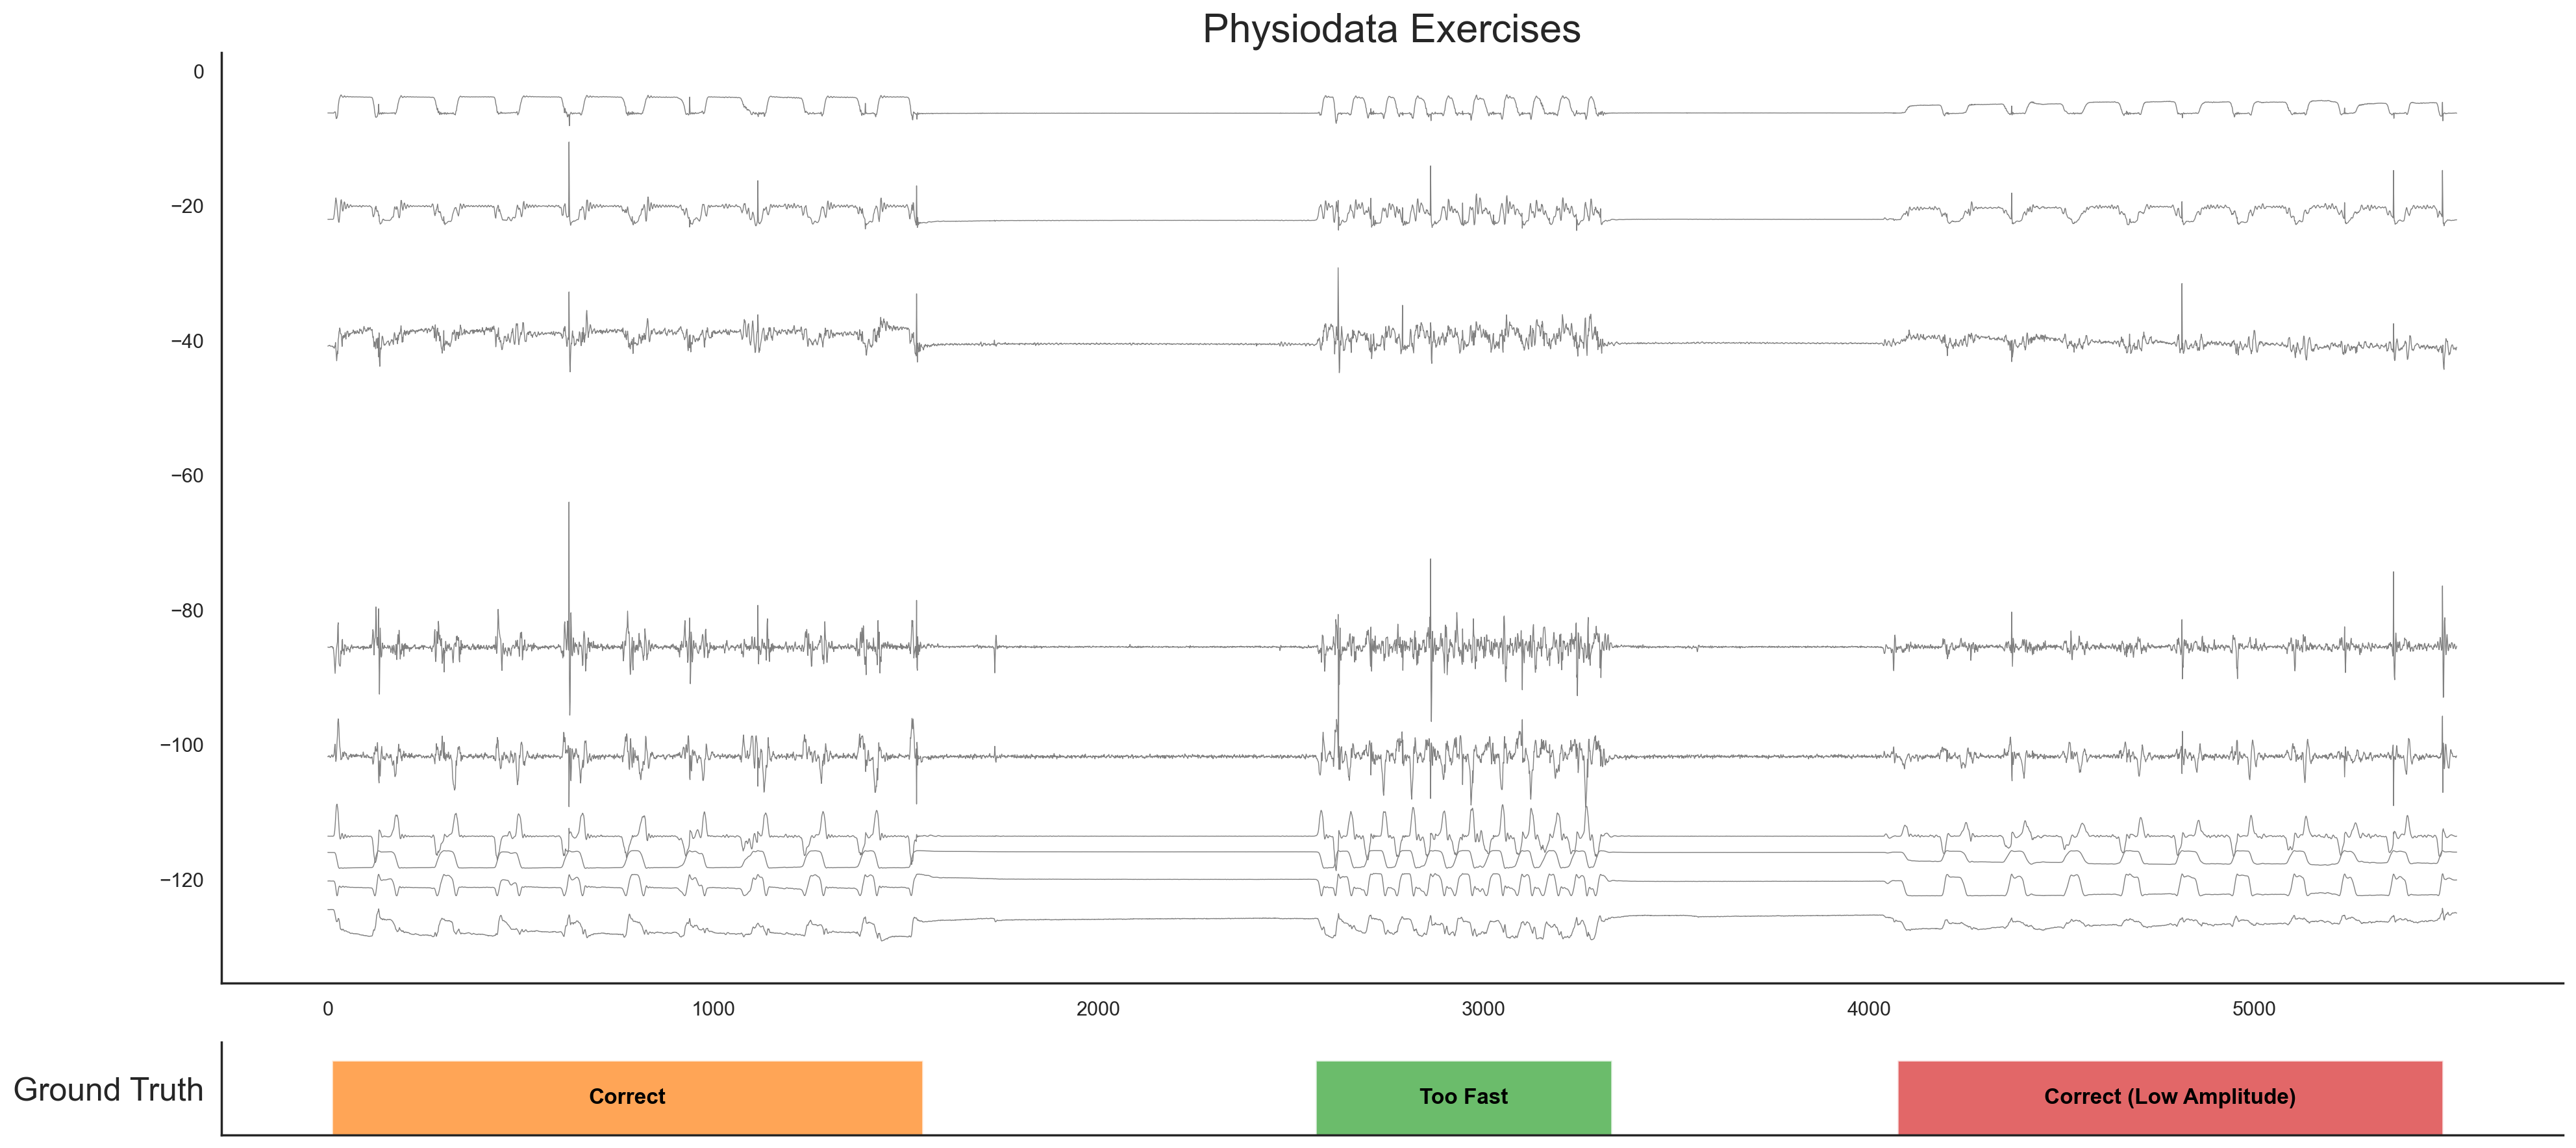

(<Figure size 2000x900 with 2 Axes>,
 array([[<Axes: title={'center': 'Physiodata Exercises'}>],
        [<Axes: >]], dtype=object))

In [39]:
# Input Parameters
f = 3          # number of sub-dimensions
k_max = 20     # expected number of repeats

ds_name = "Physiodata Exercises"

series = ts.T

print(series.shape)
# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    ground_truth=df_gt,
    dimension_labels=df.index,
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

ml.plot_dataset()

In [ ]:
# Compute lengths
motif_length_range = np.arange(201, 282, 5)
motif_length, _ = ml.fit_motif_length(
    k_max,
    motif_length_range,
    plot=True,
    plot_elbows=False,
    plot_motifsets=True,
    plot_best_only=True
)    

Compute ks (20):   0%|          | 0/19 [00:00<?, ?it/s]

In [ ]:
# f = 3       # number of sub-dimensions
k_max = 20     # expected number of repeats

series = ts.T

# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    dimension_labels=df.index,
    distance='cid',
    n_dims=f,   # number of sub-dimensions
    n_jobs=1    # number of parallel jobs
)

dists, motif_sets, elbow_points = ml.fit_k_elbow(
    k_max=k_max,
    motif_length=150,
    plot_elbows=False,
    plot_motifsets=False,
)

ml.elbow_points = [10]
ml.plot_motifset(motifset_name="Physiodata Exercises")

In [ ]:
# f = 3       # number of sub-dimensions
k_max = 20     # expected number of repeats

series = ts.T

# initialize LAMA
ml = LAMA(
    ds_name,  
    series,
    dimension_labels=df.index,
    # distance='znormed_ed',
    n_dims=f,   # number of sub-dimensions
    n_jobs=8    # number of parallel jobs
)

dists, motif_sets, elbow_points = ml.fit_k_elbow(
    k_max=k_max,
    motif_length=150,
    plot_elbows=False,
    plot_motifsets=False,
)

ml.elbow_points = [20]
ml.plot_motifset(motifset_name="Physiodata Exercises")